# PCA

### Load sample data from sklearn

In [2]:
from sklearn.datasets import load_digits

In [9]:
digits = load_digits()  #examples of handwritten digits

In [5]:
digits  #Seems like a disctionary type data file. we need only data and target from digits.

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [6]:
x = digits.data

In [7]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [10]:
x.shape  #every handwritten digit is divided in to 16x16 pixels, hence 64 columns for one digit. There are 1797 obs.

(1797, 64)

In [11]:
y = digits.target

In [13]:
y  #the target will be from 0 to 9 digits.Why last 8,9,8?

array([0, 1, 2, ..., 8, 9, 8])

In [14]:
y.shape

(1797,)

### Plot the data

In [18]:
import matplotlib.pyplot as plt

In [19]:
def plot_digit(x,index):
    plt.imshow(x.reshape(8,8))
    print(index)

4


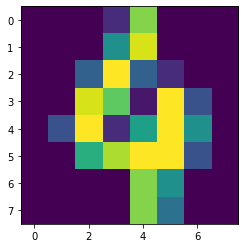

In [22]:
plot_digit(x[100],y[100])  #No significance for 100, take any value

In [23]:
x.shape

(1797, 64)

### Split the data

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [26]:
x_train.shape

(1437, 64)

### Let's apply logistic regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lr = LogisticRegression()

In [29]:
lr.fit(x_train,y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

### Prediction

In [30]:
y_pred = lr.predict(x_test)

### Evaluation Metrics

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_test,y_pred)

0.9666666666666667

### PCA - to reduce the number of dimensions

In [38]:
from sklearn.decomposition import PCA

In [39]:
pca = PCA(n_components=0.95)  #n_components-2 options. 1. How many dimensions you want. 2. We can give it in percentage

In [42]:
x_train_p1 = pca.fit_transform(x_train)
x_test_p1 = pca.transform(x_test)

In [43]:
x_train_p1.shape 

(1437, 28)

In [44]:
# dimension reduced down to 28 features

### Check accuracy

In [45]:
lr.fit(x_train_p1,y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [46]:
y_pred_p1 = lr.predict(x_test_p1)

In [47]:
accuracy_score(y_test,y_pred_p1)

0.9638888888888889

In [48]:
# accuracy reduced. But we reduced the dimension number. So complexity of algorithm reduced.

### Try specifying the number of components directly

In [49]:
pca = PCA(n_components=16)

In [50]:
x_train_p1 = pca.fit_transform(x_train)
x_test_p1 = pca.transform(x_test)

In [52]:
x_train_p1.shape 

(1437, 16)

In [53]:
lr.fit(x_train_p1,y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [55]:
y_pred_p1 = lr.predict(x_test_p1)

In [56]:
accuracy_score(y_test,y_pred_p1)

0.9333333333333333

In [58]:
### getting 93.3 accuracy even we have reduced the no. of dimensions to 16 - That is actually good

In [62]:
x_train_p1[0]  #The values are not in pixel format anymore. We have tranformed the data.Note: We are not dropping columns, instead we are transforming them.

array([ 23.37877438,   4.966181  ,  18.36834338,  -6.11218104,
         1.63767761,   4.08430892,   4.74182343, -11.94982164,
         0.25308348,  -4.1419579 ,  -5.41074932,   3.4278319 ,
         1.25926983,   4.86252551,  -4.43842228,  10.140458  ])